### Addendum A: Within-subject angular deviation

Warren at al. also compared the within-subject angular deviation of their groups.
Here, the corresponding question would be: Is one model significantly better or worse in predicting this deviation than the other?

I only compare the VA and Em1 models.

#### A.1 Shortcuts dataset

In [1]:
# Shortcuts dataset: Load the files and partition accordingly

import numpy as np
import scipy.stats

dataset_ae = np.loadtxt("datasets/dataset_ae.txt", delimiter="\t", dtype=float)
ad_va = scipy.stats.circstd(dataset_ae[:, :8], np.pi, -np.pi, axis=1)
ad_em1 = scipy.stats.circstd(dataset_ae[:, 8:16], np.pi, -np.pi, axis=1)

print("Shortcuts dataset:")
print("Avg. angular deviation: va: {:.4f}° | em1: {:.4f}°".format(
    np.rad2deg(scipy.stats.circmean(ad_va, np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean(ad_em1, np.pi, -np.pi))))

Shortcuts dataset:
Avg. angular deviation: va: 29.7480° | em1: 32.1478°


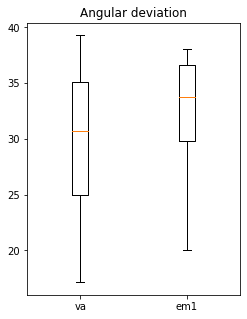

In [3]:
# [RUN TWICE for large plots!] Boxplot of the angular deviation
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 5]

ax = plt.subplot(131)
ax.boxplot([np.rad2deg(ad_va), np.rad2deg(ad_em1)])
ax.set_xticklabels(["va", "em1"])
ax.set_title("Angular deviation")

plt.show()


In [4]:
# Statistical tests

import pycircstat
import function_repository4 as fr4

print("Cohen's d (VA-em1): {}, Circular: {}".format(fr4.cohens_d(ad_va, ad_em1), 
    fr4.cohens_d(ad_va, ad_em1, circular=True)))
ww_p, ww_f = pycircstat.tests.watson_williams(ad_va, ad_em1)
print("VA-Em1: Wattson-Williams result: p={}".format(ww_p))
ww_f

Cohen's d (VA-em1): -0.37113985563874863, Circular: -0.341209658383499
VA-Em1: Wattson-Williams result: p=0.4169440638048728


,df,SS,MS,F,p-value
Source,,,,,
Columns,1.0,0.004360,0.004360,0.69031,0.416944
Residual,18.0,0.114185,0.006344,NaN,NaN
Total,19.0,0.118545,NaN,NaN,NaN


#### A.2 Rips and folds dataset

Rips and folds dataset:
Avg. angular deviation: va: 42.3601° | em1: 33.7746°


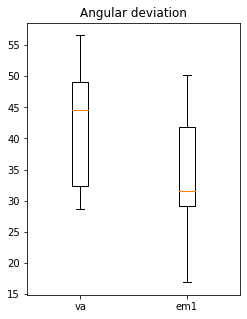

In [5]:
# Rips and folds dataset: Load the files and partition accordingly

dataset_ae = np.loadtxt("datasets/dataset_RnF_ae3.txt", delimiter="\t", dtype=float)
ad_va = scipy.stats.circstd(dataset_ae[:, :8], np.pi, -np.pi, axis=1)
ad_em1 = scipy.stats.circstd(dataset_ae[:, 8:16], np.pi, -np.pi, axis=1)

print("Rips and folds dataset:")
print("Avg. angular deviation: va: {:.4f}° | em1: {:.4f}°".format(
    np.rad2deg(scipy.stats.circmean(ad_va, np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean(ad_em1, np.pi, -np.pi))))

ax = plt.subplot(131)
ax.boxplot([np.rad2deg(ad_va), np.rad2deg(ad_em1)])
ax.set_xticklabels(["va", "em1"])
ax.set_title("Angular deviation")
plt.show()


In [6]:
# Statistical tests

import pycircstat

print("Cohen's d (VA-em1): {}, Circular: {}".format(fr4.cohens_d(ad_va, ad_em1), 
    fr4.cohens_d(ad_va, ad_em1, circular=True)))
ww_p, ww_f = pycircstat.tests.watson_williams(ad_va, ad_em1)
print("VA-Em1: Wattson-Williams result: p={}".format(ww_p))
ww_f

Cohen's d (VA-em1): 0.8589928091813189, Circular: 0.8457534346459336
VA-Em1: Wattson-Williams result: p=0.05725935390372907


,df,SS,MS,F,p-value
Source,,,,,
Columns,1.0,0.060871,0.060871,4.07045,0.057259
Residual,20.0,0.302147,0.015107,NaN,NaN
Total,21.0,0.363018,NaN,NaN,NaN


In [7]:
# Cohen's d 2.0, testing cases

# test conditions
c0 = np.array([2, 4, 7, 3, 7, 35, 8, 9])
c1 = np.array([i * 2 for i in c0])

def cohen1(x1, x2):
    cohens_d = (np.mean(x1) - np.mean(x2)) / (np.sqrt((np.var(x1,ddof=1) + 
                                                       np.var(x2,ddof=1)) / 2))
    return cohens_d

def cohen2(x1, x2):
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    mx1 = np.mean(x1)
    mx2 = np.mean(x2)

    var1 = 1/(n1-1)*np.sum((x1-mx1)**2)
    var2 = 1/(n2-1)*np.sum((x2-mx2)**2)

    s = np.sqrt(((n1-1)*var1+(n2-1)*var2)/(n1+n2-2))

    d = (mx1-mx2)/s
    return d

def cohen3(x1, x2):
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    mean_x1 = scipy.stats.circmean(x1, np.pi, -np.pi)
    mean_x2 = scipy.stats.circmean(x2, np.pi, -np.pi)

    var1 = 1/(n1-1)*np.sum(((x1-mean_x1+np.pi)%(2*np.pi)-np.pi)**2)
    var2 = 1/(n2-1)*np.sum(((x1-mean_x1+np.pi)%(2*np.pi)-np.pi)**2)

    s = np.sqrt(((n1-1)*var1+(n2-1)*var2)/(n1+n2-2))

    d = ((mean_x1-mean_x2+np.pi)%(2*np.pi)-np.pi)/s
    return d

print(cohen1(c0,c1))
print(cohen2(c0,c1))
print(cohen3(np.deg2rad(c0),np.deg2rad(c1)))

-0.5567679522645598
-0.5567679522645598
-0.8123763756155098
